# Algoritmos de optimización - Reto 3

Nombre: Juan Carlos Gómez Echevarría<br>
Github: https://github.com/jucargoe/viu_algoritmos_optimizacion/tree/master<br>

## Algoritmo genético. Agente viajero
Se utilizará el algoritmo genético para resolver el problema del agente viajero (TSP). Se utilizará el siguiente grafo como representación de la conexión de varias ciudades:

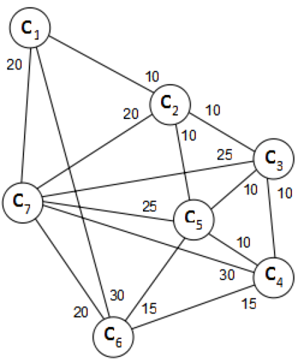

In [3]:
import random
import numpy as np

# Creo el diccionario de rutas basado en el grafo de la imagen
routes_costs = {
    'C1': {'C2': 10, 'C3': np.inf, 'C4': np.inf, 'C5': np.inf, 'C6': 30, 'C7': 20},
    'C2': {'C1': 10, 'C3': 10, 'C4': np.inf, 'C5': 10, 'C6': np.inf, 'C7': 20},
    'C3': {'C1': np.inf, 'C2': 10, 'C4': 10, 'C5': 10, 'C6': np.inf, 'C7': 25},
    'C4': {'C1': np.inf, 'C2': np.inf, 'C3': 10, 'C5': 10, 'C6': 15, 'C7': 30},
    'C5': {'C1': np.inf, 'C2': 10, 'C3': 10, 'C4': 10, 'C6': 15, 'C7': 25},
    'C6': {'C1': 30, 'C2': np.inf, 'C3': np.inf, 'C4': 15, 'C5': 15, 'C7': 20},
    'C7': {'C1': 20, 'C2': 20, 'C3': 25, 'C4': 30, 'C5': 25, 'C6': 20}
}

def calculate_cost(solution):
    """
        Se calcula el coste de la solución encontrada
    """
    cost = 0
    for i in range(len(solution)-1):
        cost += routes_costs[solution[i]][solution[i+1]]
    return cost


def is_valid_solution(solution):
    """
        Se comprueba si la solución encontrada es una solución válida
    """
    return solution[0] == start_point and solution[-1] == start_point and calculate_cost(solution) != np.inf


def random_gene_swap(child):
    """
        Se permutan dos genes del hijo en caso de mutación
    """
    pos1, pos2 = random.sample(range(1, len(child)), 2)
    city1 = child[pos2]
    city2 = child[pos1]
    child[pos1] = city1
    child[pos2] = city2
    return child


def generate_child(start_point):
    """
        Se genera un hijo en base a dos soluciones aleatorias ya encontradas
        Este hijo será el resultado de la combinación aleatoria de genes del padre y de la madre
        Se establece el umbral de mutación en un 30% (1-0.7). Dicho de otra forma, si la probabilidad de mutación es >= 0.7, se produce la mutación
    """
    mutation_prob = random.random()
    mutation_treshold = 0.7
    s1, s2 = random.sample(solutions, 2)
    child = [start_point]
    
    while len(child) < len(s1)-1:
        if random.random() >= 0.5:
            child.append(random.choice(s1))
        else:
            child.append(random.choice(s2))

        child = list(dict.fromkeys(child))
    
    if mutation_prob >= mutation_treshold:
        child = random_gene_swap(child)
    
    child.append(start_point)
    return child


def calculate_best_route(start_point, solutions):
    """
        Se calcula la mejor ruta en base a un punto de partida y dos soluciones cualesquiera.
        Se realizarán max_childs combinaciones y se escogerá la mejor. Si hay más de una igual, se escogerá una aleatoria
    """
    best_cost = np.inf
    best_solution = []
    max_childs = 2000
    iterations = 0
    
    for i in range(max_childs):
        iterations += 1
        child = generate_child(start_point)
        if is_valid_solution(child):
            solutions.append(child)
    
    for solution in solutions:
        cost = calculate_cost(solution)
        if cost <= best_cost:
            best_cost = cost
            best_solution = solution

    print(f"La mejor solución es: {best_solution} con coste {best_cost}")



# Establezco un punto de partida
start_point = 'C1'
# Creo una lista con dos posibles soluciones cualesquiera, las cuales se usarán para generar hijos y obtener así otras posibles soluciones
solutions = [
    [start_point, 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', start_point], [start_point, 'C7', 'C5', 'C6', 'C4', 'C3', 'C2', start_point]
]
calculate_best_route(start_point, solutions)

# Establezco un punto de partida distinto
start_point = 'C5'
# Creo otra lista diferente con dos posibles soluciones cualesquiera
solutions = [
    [start_point, 'C3', 'C4', 'C6', 'C7', 'C1', 'C2', start_point], [start_point, 'C7', 'C1', 'C2', 'C3', 'C4', 'C6', start_point]
]
calculate_best_route(start_point, solutions)

La mejor solución es: ['C1', 'C2', 'C5', 'C3', 'C4', 'C6', 'C7', 'C1'] con coste 95
La mejor solución es: ['C5', 'C2', 'C1', 'C7', 'C6', 'C4', 'C3', 'C5'] con coste 95
